# WEB ANALYTICS - FINAL PROJECT 
### Group: Abdelmalek Hajjam, Monu Chacko



For the final project we will use the knowledge gained in the class to analyze a dataset of comments for a given discussion. We will Take a discussion thread from reddit and analyze its comments. Reddit is a social news aggregation site, rating contents, and discussions. Registered members submit content to the site such as links, text posts, and images, which are then voted up or down by other members. This network can be analyzed to determine its sentiment and network itself. Kaggle provides us many datasets that are collected from many places. It also includes comments data from reddit. We can use this dataset to do our analysis. Reddit comments dataset https://www.kaggle.com/reddit/reddit-comments-may-2015 contains about 1.7 billion records. To perform analysis, kaggle provides us a smaller subset of data. We took that subset and reduced further to get a new subset of decent csv files that can be read and analyzed. All comments and users used in these 3 CSV files we are going to use, are coming from a single subreddit or subject, in this case it was "What is the strongest opinion you hold?".

In this project, we will use 2 parts. One part to study the network analysis where the nodes are the users and the edges between any 2 nodes are all the comments and recomments between any 2 users, and the other part to do sentimental analysis on the comments. So let's go!!!

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import operator
import numpy as np
import scipy.stats
import nltk
import warnings
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#nltk.download('vader_lexicon')
warnings.filterwarnings('ignore')

In [87]:
# Load the comments and users data
reddit = pd.read_csv('comments_grp_data.csv',sep=',')
reddit_comment = pd.read_csv('comments_data.csv',sep=';')
users = pd.read_csv('users_data.csv',sep=';')

In [88]:
# View the data
reddit.loc[0:15]

,author,responder,weight
0,---DevilsAdvocate---,dannybtw,1
1,---DevilsAdvocate---,ThisFreaknGuy,2
2,-Covariance,DomeSlave,1
3,-Mountain-King-,ASK_ABOUT_STEELBEAMS,3
4,-Mountain-King-,AvoidNoiderman,2
5,-Mountain-King-,Bigfrostynugs,1
6,-Mountain-King-,Dsiroon37,1
7,-Mountain-King-,giantzoo,1
8,-Mountain-King-,iramo94,3
9,-Mountain-King-,omegashadow,1


In [92]:
print("Shape of reddit dataset:", reddit.shape)
print("Shape of comments dataset:", reddit_comment.shape)
print("Shape of users dataset:", users.shape)

Shape of reddit dataset: (18701, 3)
Shape of comments dataset: (24134, 13)
Shape of users dataset: (9928, 3)


In [93]:
# Initialize graph
G = nx.Graph()

# Add nodes
nodes = set(reddit.loc[:, "author"])
nodes.union(set(reddit.loc[:, "responder"]))
nodes = list(nodes)
nodes
G.add_nodes_from(nodes)

# Add edges with weights
G.add_weighted_edges_from([tuple(x) for x in reddit.values])

### View the network

C:\Users\moc9029\AppData\Roaming\Python\Python37\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


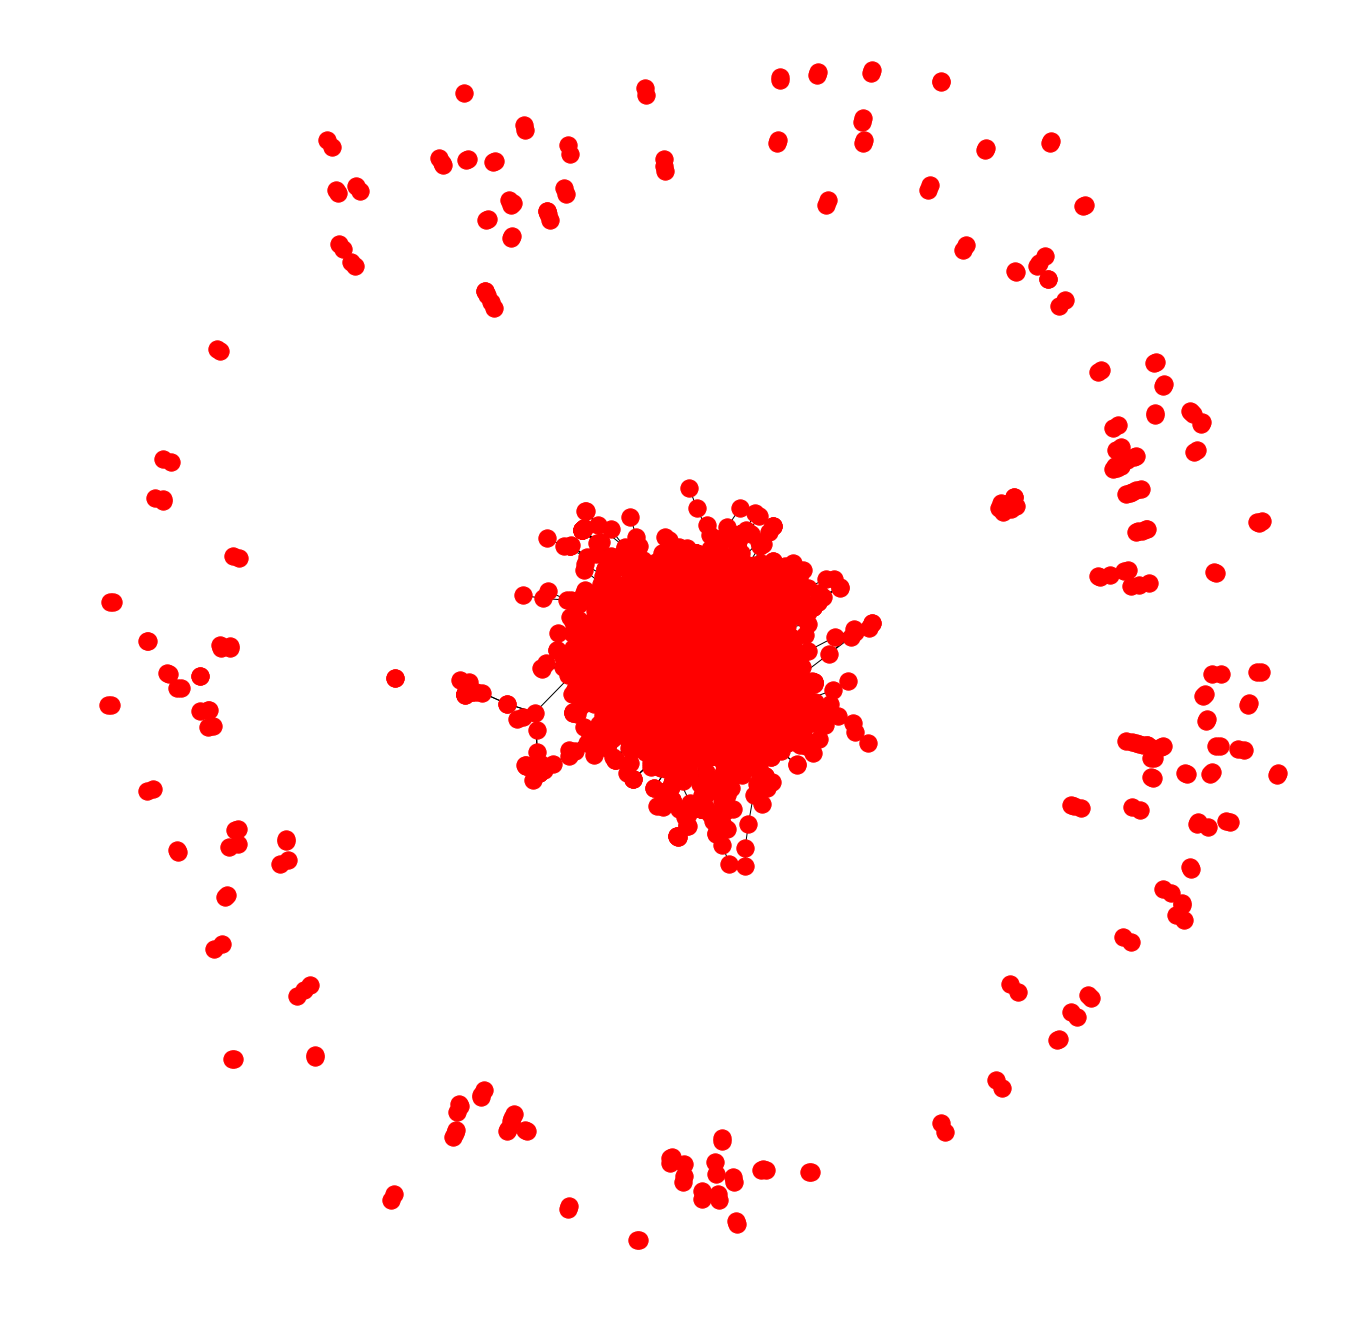

In [6]:
%matplotlib inline
fig = plt.figure(figsize=(18, 18))
nx.draw(G)
plt.show()

### Diagram of the entire network using Gephi

We also use Gephi for our analysis. Gephi is an open-source network analysis and visualization software package. It provides us powerful interactive tools to work with networks. Following is the view of the entire network.

![Network](https://raw.githubusercontent.com/monuchacko/WebAnalytics/master/networkdia2.png)

### We used Gephis ForceAtlas 2 preset to generate network diagram

Force Atlas 2 attempts to resolve the shortcomings of the Force Atlas algorithm by making a balance between the quality of the final layout and the speed of the computation algorithm. Its performance for large networks is much better when compared to the Force Atlas layout algorithm. Please see the network generated using Force Atlas 2 

![Network](https://raw.githubusercontent.com/monuchacko/WebAnalytics/master/networkdia1.png)

### Now that we have our graph, let's analyze it and reveal some of its properties

In [7]:
# Total number of nodes
nx.number_of_nodes(G)

10233

In [8]:
# Number of edges
G.number_of_edges()

15756

In [9]:
# Number of connected components
nx.number_connected_components(G)

129

In [10]:
# Ten largest subgraphs
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)[0:10]]

[9928, 9, 6, 5, 5, 5, 5, 5, 4, 4]

In [11]:
# Select the largest connected subgraph
G = max(nx.connected_component_subgraphs(G), key=len)
G.number_of_nodes()

9928

In [12]:
nx.diameter(G)

16

In [13]:
nx.average_shortest_path_length(G, weight='weight')

5.211905025136356

In [14]:
# Calculate betweenness centrality
centr_bw = nx.betweenness_centrality(G, weight='weight')

# Calculate degree centrality
centr_deg = nx.degree_centrality(G)

# Combine betweenness and degree centralities into a single data frame
df1 = pd.DataFrame(list(centr_bw.items()), columns=['User', 'Betweenness'])
df2 = pd.DataFrame(list(centr_deg.items()), columns=['User', 'Degree'])
users = df1.join(df2.set_index('User'), on='User')
users.sort_values(['Betweenness', 'Degree'], ascending = False, inplace=True)

users[0:25]

,User,Betweenness,Degree
1493,CDC_,0.087609,0.035560
2176,corby315,0.074198,0.023471
1580,fundygud,0.051563,0.020248
879,Lemonaxe,0.049766,0.021557
1465,bazzil350,0.049643,0.019845
2290,hawkish25,0.049423,0.017125
1535,Supersoakthatho,0.048042,0.017729
1003,FenrisCain,0.046511,0.018535
159,ohitsali,0.045828,0.018535
1230,mstrdpncks,0.045789,0.017528


### Let's check on a user and his interactions in the graph. In this case we check on user "CatNamedJava"

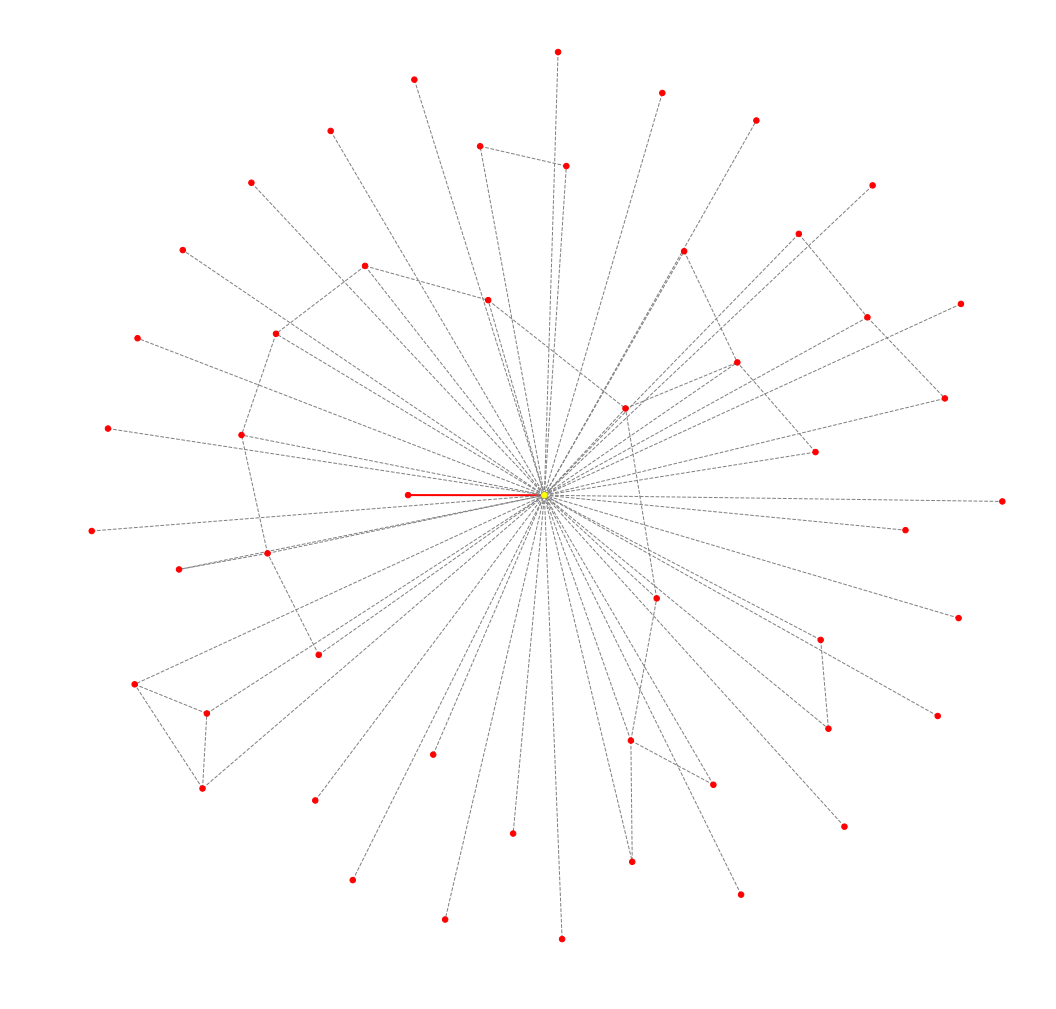

<Figure size 432x288 with 0 Axes>

In [95]:
%matplotlib inline
fig = plt.figure(figsize=(18, 18))

main = 'CatNamedJava'

# Select neighbors and neighbors of neighbors
subG = G.neighbors(main)

n_list = subG
for n in subG:
    n_list = list(n_list) + [G.neighbors(n)]
n_list = list(set(n_list))
n_list.append(main)

# Isolate the subnetwork
subG = G.subgraph(n_list)

# Get color map
colormap =[]
for n in subG.nodes():
    if n==main:
        colormap.append('yellow')
    else:
        colormap.append('red')
     
# Separate edges by weight - 1 and more than 1
elarge=[(u,v) for (u,v,d) in subG.edges(data=True) if d['weight']>1]
esmall=[(u,v) for (u,v,d) in subG.edges(data=True) if d['weight']==1]

# Layout
pos=nx.spring_layout(subG)

# Draw nodes
nx.draw_networkx_nodes(subG,pos,node_color=colormap,node_size=30)

# Draw edges
nx.draw_networkx_edges(subG, pos, edgelist=elarge, width=2, edge_color='r')
nx.draw_networkx_edges(subG, pos, edgelist=esmall, width=1, edge_color='grey', style='dashed')

plt.axis('off')
plt.show()
plt.gcf().clear()

### Diagram applying filters for range (betweeness centrality) and degree range in Gephi

![Network](https://raw.githubusercontent.com/monuchacko/WebAnalytics/master/betweennesscentra.png)

### Diagram showling Closeness Centrality in Gephi 

![Network](https://raw.githubusercontent.com/monuchacko/WebAnalytics/master/closenesscentra.png)

In [25]:
# Save network
#nx.write_graphml(G, "rd.graphml")

## SENTIMENT ANALYSIS

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [29]:
sentiment = pd.read_excel('sentiment_data.xlsx')

In [71]:
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
    print("Overall sentiment dictionary is : ", sentiment_dict) 
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
    print("Sentence Overall Rated As", end = " ") 
  
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        print("Positive") 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        print("Negative") 
  
    else : 
        print("Neutral") 

In [86]:
print("Test for sentiment score") 
sentence = "Geeks For Geeks is the best portal for the computer science engineering students." 

# function calling 
sentiment_scores(sentence) 

print("\n2nd Statement :") 
sentence = "study is going on as usual"
sentiment_scores(sentence) 

print("\n3rd Statement :") 
sentence = "I am vey sad today."
sentiment_scores(sentence) 

Test for sentiment score
Overall sentiment dictionary is :  {'neg': 0.165, 'neu': 0.588, 'pos': 0.247, 'compound': 0.5267}
sentence was rated as  16.5 % Negative
sentence was rated as  58.8 % Neutral
sentence was rated as  24.7 % Positive
Sentence Overall Rated As Positive

2nd Statement :
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral

3rd Statement :
Overall sentiment dictionary is :  {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}
sentence was rated as  50.8 % Negative
sentence was rated as  49.2 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Negative


#### All sentiments in the comments file were calculated through the above function and compiled into the excel above to save time.

In [31]:
sentiment[0:10]

,Unnamed: 0,id,author,responder,comment,sentiment,compound,neg,neu,pos
0,0,1320251,redditminus,Wheeeler,With face herpes,neu,0.0000,0.000,1.000,0.000
1,1,1320252,redditminus,corby315,Unfortunately it's the kids that end up gettin...,neu,-0.6597,0.403,0.597,0.000
2,2,1320253,redditminus,Theemuts,"Nah man, freedom of choice and fuck all conseq...",neu,0.3549,0.213,0.557,0.230
3,3,1320254,redditminus,phuicy,"They only real solution is education, because ...",neu,-0.2263,0.173,0.703,0.124
4,4,1320255,redditminus,qwerty12qwerty,Heard a good quote a few years back in Governm...,neu,0.8555,0.070,0.704,0.226
5,5,1320256,redditminus,thegreatestajax,Really? The last personal moral stance that yo...,neu,-0.6072,0.220,0.780,0.000
6,6,1320257,redditminus,Tom_Stall,Such a brave opinion on reddit.,neu,0.5267,0.000,0.541,0.459
7,7,1320258,redditminus,gamecock5446,I think Jenny McCarthy is personally responsib...,neu,-0.2500,0.226,0.616,0.158
8,8,1320259,redditminus,Thil0,what if scientists find out in a couple of yea...,neu,-0.3971,0.139,0.751,0.110
9,9,1320260,redditminus,Maharog,Their children dying of preventable diseases s...,neu,-0.0258,0.314,0.378,0.308


In [32]:
# Top 10 negative comments
sentiment.sort_values(['compound'], ascending = True)[0:10]

,Unnamed: 0,id,author,responder,comment,sentiment,compound,neg,neu,pos
21099,21099,1362638,illTwinkleYourStar,AppleCoreThing,"I agree with most of this comment, about the p...",neu,-0.9990,0.312,0.591,0.097
14532,14532,1345163,kwhitegocubs,toThe9thPower,"&gt; Revenge does not unrape the raped, resurr...",neu,-0.9990,0.346,0.594,0.060
4840,4840,1328721,SnakeHelah,maypolecrup,&gt; I don't understand the now rising and pop...,neu,-0.9989,0.259,0.639,0.102
8316,8316,1334623,StraightTalkAdvice,digiacom,"First, [H.L. Mencken](http://grammar.about.com...",neu,-0.9988,0.350,0.571,0.079
23507,23507,1395865,PM_Tits_4_LifeMottos,Pixiepup,"I'm trying to feel you here, but things like ""...",neu,-0.9987,0.374,0.554,0.072
21301,21301,1363913,Altered_Amiba,besjbo,&gt;But you can't prove those are the same peo...,neu,-0.9986,0.170,0.732,0.098
20776,20776,1361273,Altered_Amiba,besjbo,&gt;The group itself isn't that way and the wh...,neu,-0.9983,0.175,0.754,0.071
3144,3144,1325119,BillMaher4President,machenise,There are actually some pretty good arguments ...,neu,-0.9983,0.387,0.548,0.065
21141,21141,1362843,besjbo,Altered_Amiba,&gt;I wasn't trying to say that everyone who s...,neu,-0.9983,0.181,0.753,0.067
20514,20514,1360148,besjbo,Altered_Amiba,&gt;Will me finding one example of a person em...,neu,-0.9983,0.198,0.728,0.074


In [33]:
# Most negative comment
comm = sentiment.sort_values(['compound'], ascending = True)[0:1]['comment']
print(str(comm.values.flatten()))

["I agree with most of this comment, about the problem of feminism being a white middle class movement definitely, and modern feminists need to work to combat that.\r\r\n\r\r\nYou're right that a study on false rape accusations is hard to conduct. But I find your comment about the many men whose lives have been ruined by false rape accusations a little strange, when the number of women and men whose lives have been ruined by actual rape is a much more statistically significant problem. \r\r\n\r\r\nI'm not dismissing false rape accusations, but they are notoriously over-represented in the media and all studies (admittedly never going to be perfect studies) have shown them to be extremely fringe in the face of actual rape cases. The sequence of events following a rape accusation are so unpleasant to make false accusations less appealing. \r\r\n\r\r\nFrom [here] (http://www.shakesville.com/2005/12/dont-just-blame-victim-prosecute-her.html) (and admittedly empassioned article)\r\r\n\r\r\n&

In [34]:
# Top 10 positive comments
sentiment.sort_values(['compound'], ascending = False)[0:10]

,Unnamed: 0,id,author,responder,comment,sentiment,compound,neg,neu,pos
22830,22830,1379322,bulldoozer,CeasarTheFirst,I'm not screaming rhetoric. You implied that m...,neu,0.9990,0.071,0.729,0.201
21864,21864,1368247,kingphysics,0therworldly,&gt; I'm only going to start my undergrad Phys...,neu,0.9977,0.057,0.787,0.156
623,623,1321385,MeowMixSong,LadyKa,"Hard-core, willfully blind, forcing-their-view...",neu,0.9975,0.020,0.759,0.220
21633,21633,1366494,GMDev,mrgud69,I absolutely understand where you're coming fr...,neu,0.9975,0.062,0.689,0.249
18723,18723,1353881,franklymydeer,lsdmthcosmos,"Absolutely, you hit it spot on about the gradi...",neu,0.9973,0.052,0.774,0.174
16693,16693,1349343,Joshoowuh,I_love_propofol,I'm a doctor in the UK. I believe that healthc...,neu,0.9969,0.056,0.778,0.166
20773,20773,1361267,Saytahri,___OccamsChainsaw___,"&gt; Yes I would have, my 2nd example was an e...",neu,0.9968,0.070,0.665,0.265
24073,24073,1659093,PsychoPhilosopher,0therworldly,Nice list. Would've been more constructive to ...,neu,0.9964,0.087,0.730,0.184
20791,20791,1361344,steavoh,lessmiserables,It's one of the issues I do have with conserva...,neu,0.9961,0.029,0.785,0.187
8506,8506,1334955,Catatonic27,happybadger,We're in a transitional era when it comes to h...,neu,0.9959,0.034,0.821,0.145


In [35]:
# Most positive comment
comm = sentiment.sort_values(['compound'], ascending = False)[0:1]['comment']
print(str(comm.values.flatten()))

['I\'m not screaming rhetoric. You implied that my intentions we\'re naive and unfounded. I don\'t have all of the answers, no one does. Even if I attempted to answer all of them, there\'s a sound argument against them. You\'re right it\'s not black and white, however, neither is the solution to this. \r\r\n \r\r\nCapitalism is not a long-term sustainable solution, much in the same way communism is not a good conductor of progress/innovation. The nature of both systems lead to failure. \r\r\n \r\r\nCapitalism in the US and abroad has lasted as long as it has because there is a mix of socialism in there; obviously, moreso in the EU than in the US, but it provides a level of sustainability to society. The spoils (money) generated by a capitalist society are partially spread to everyone. In a way one could argue that everyone played a part in everyone\'s success, because things happened the way they did. \r\r\n \r\r\nCapitalism fails in that it\'s not the real system, it\'s just somewhat 

In [36]:
# Top 10 negative comments
sentiment.sort_values(['neg'], ascending = False)[0:10]

,Unnamed: 0,id,author,responder,comment,sentiment,compound,neg,neu,pos
1651,1651,1322940,PM_Tits_4_LifeMottos,mivipa,I disagree.,neg,-0.3818,1.0,0.0,0.0
10862,10862,1338623,MrConfucius,BuckYouFungie,No.,neg,-0.2960,1.0,0.0,0.0
2210,2210,1323695,smileedude,aeternitatisdaedalus,WRONG,neg,-0.4767,1.0,0.0,0.0
22654,22654,1376050,soloesliber,megaRXB,No.,neg,-0.2960,1.0,0.0,0.0
7399,7399,1333126,TheMile,thegreatestprime,Disagree.,neg,-0.3818,1.0,0.0,0.0
573,573,1321301,spookyb0ss,kevo7777,bullshit.,neg,-0.5859,1.0,0.0,0.0
3404,3404,1326095,killminusnine,Rcmike1234,:(,neg,-0.4404,1.0,0.0,0.0
20737,20737,1361118,barbiewannabe23,SeaOfAnarchy,sorry,neg,-0.0772,1.0,0.0,0.0
16404,16404,1348732,Odd_craving,Robtonight,No.,neg,-0.2960,1.0,0.0,0.0
20528,20528,1360203,[deleted],PMME_YOUR_TITS_WOMAN,Wrong.,neg,-0.4767,1.0,0.0,0.0


In [37]:
# Top 10 positive comments
sentiment.sort_values(['pos'], ascending = False)[0:10]

,Unnamed: 0,id,author,responder,comment,sentiment,compound,neg,neu,pos
17763,17763,1351540,ADubs62,Executiveabsurdities,Yep.,pos,0.2960,0.0,0.0,1.0
22932,22932,1380907,Stinkybelly,saddstar,Agreed.,pos,0.2732,0.0,0.0,1.0
23446,23446,1394422,05banks,3jt,Congratulations.,pos,0.5994,0.0,0.0,1.0
3700,3700,1326708,xxbearillaxx,phuicy,:)\r\r\n,pos,0.4588,0.0,0.0,1.0
2524,2524,1324025,corby315,thegreatestprime,Agree.,pos,0.3612,0.0,0.0,1.0
6958,6958,1332102,rgonzal,soggybooty92,LOL \r\r\n\r\r\nU R FUNNY,pos,0.6908,0.0,0.0,1.0
5923,5923,1330412,barassmonkey17,crazy_weird_rabbit,Lol,pos,0.4215,0.0,0.0,1.0
21247,21247,1363544,StandardFiend,fusterclux,lmao,pos,0.5994,0.0,0.0,1.0
843,843,1321845,bazzil350,bigblah,Agreed.,pos,0.2732,0.0,0.0,1.0
11559,11559,1339834,-Mountain-King-,Dsiroon37,yes.,pos,0.4019,0.0,0.0,1.0


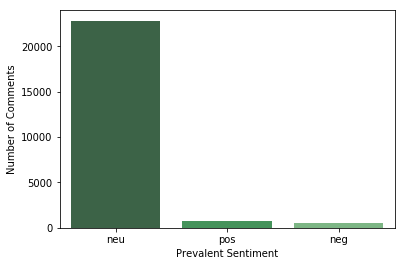

In [38]:
# Plot prevalent sentiment of comments
import seaborn as sns
sns.countplot(x="sentiment", data = sentiment, palette="Greens_d");
plt.ylabel('Number of Comments')
plt.xlabel('Prevalent Sentiment')
plt.show()

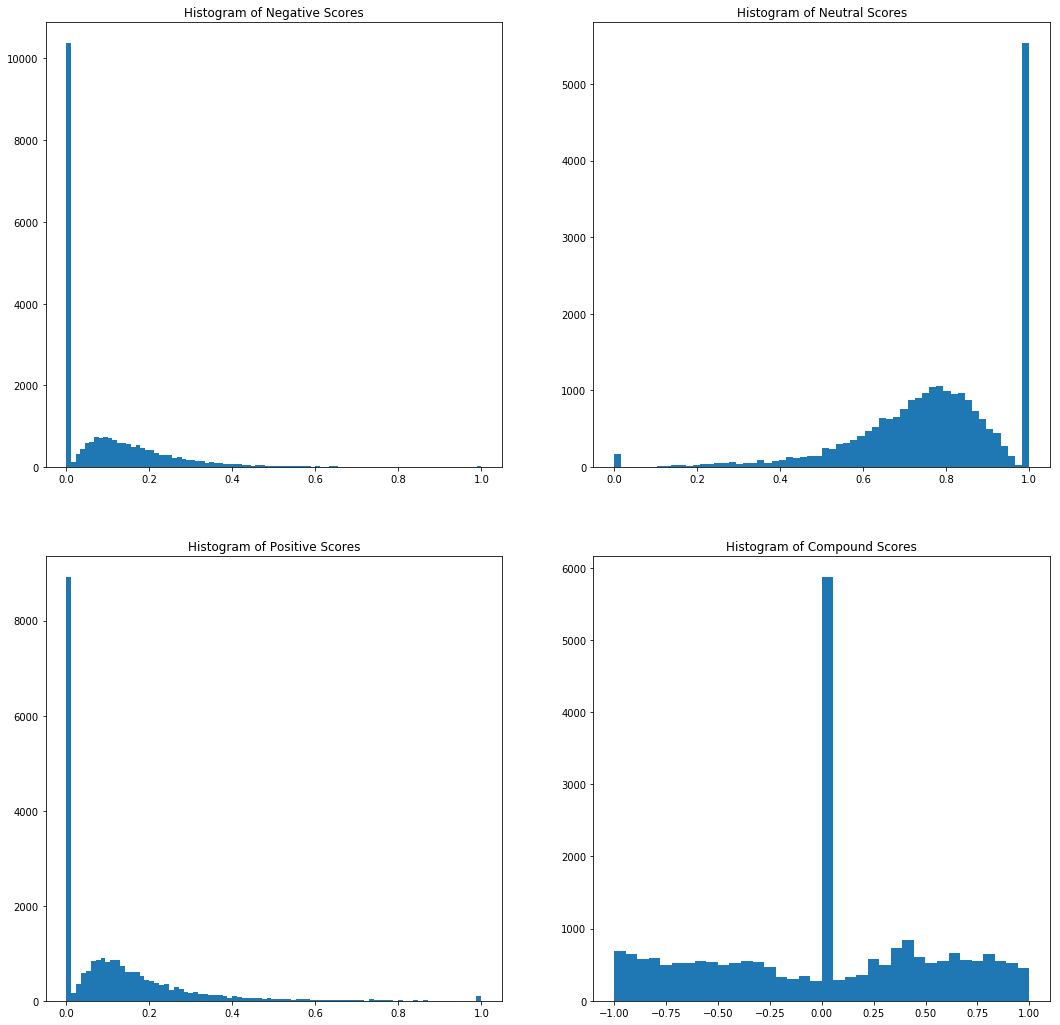

<Figure size 432x288 with 0 Axes>

In [39]:
# Plot histograms of all scores
plt.figure(figsize=(18, 18))

plt.subplot(221)
plt.hist(sentiment['neg'], bins='auto')
plt.title("Histogram of Negative Scores")

plt.subplot(222)
plt.hist(sentiment['neu'], bins='auto')
plt.title("Histogram of Neutral Scores")

plt.subplot(223)
plt.hist(sentiment['pos'], bins='auto')
plt.title("Histogram of Positive Scores")

plt.subplot(224)
plt.hist(sentiment['compound'], bins='auto')
plt.title("Histogram of Compound Scores")

plt.show()
plt.gcf().clear()

### Merge..

In [106]:
# Merge sentiment scores and node centralities
avg_sentiment = sentiment.groupby(['responder'])['compound'].agg(['mean', 'count']).reset_index()
avg_sentiment.rename(columns={'responder': 'username', 'mean': 'avg_sentiment'}, inplace=True)
sentiment_analysis = users.merge(avg_sentiment,on=['username'])

### Table showing centrality and sentiments (Table 1:1)

In [107]:
sentiment_analysis[0:10]

,username,betweenness,degree,avg_sentiment,count
0,CDC_,0.087609,0.035560,0.183883,6
1,corby315,0.074198,0.023471,0.060397,30
2,fundygud,0.051563,0.020248,0.207526,74
3,bazzil350,0.049644,0.019845,0.184180,5
4,hawkish25,0.049423,0.017125,-0.088850,2
5,Supersoakthatho,0.048042,0.017729,-0.340000,1
6,FenrisCain,0.046511,0.018535,0.012000,4
7,ohitsali,0.045828,0.018535,0.234518,22
8,mstrdpncks,0.045789,0.017528,0.231965,81
9,tehweave,0.044902,0.016218,-0.557400,1


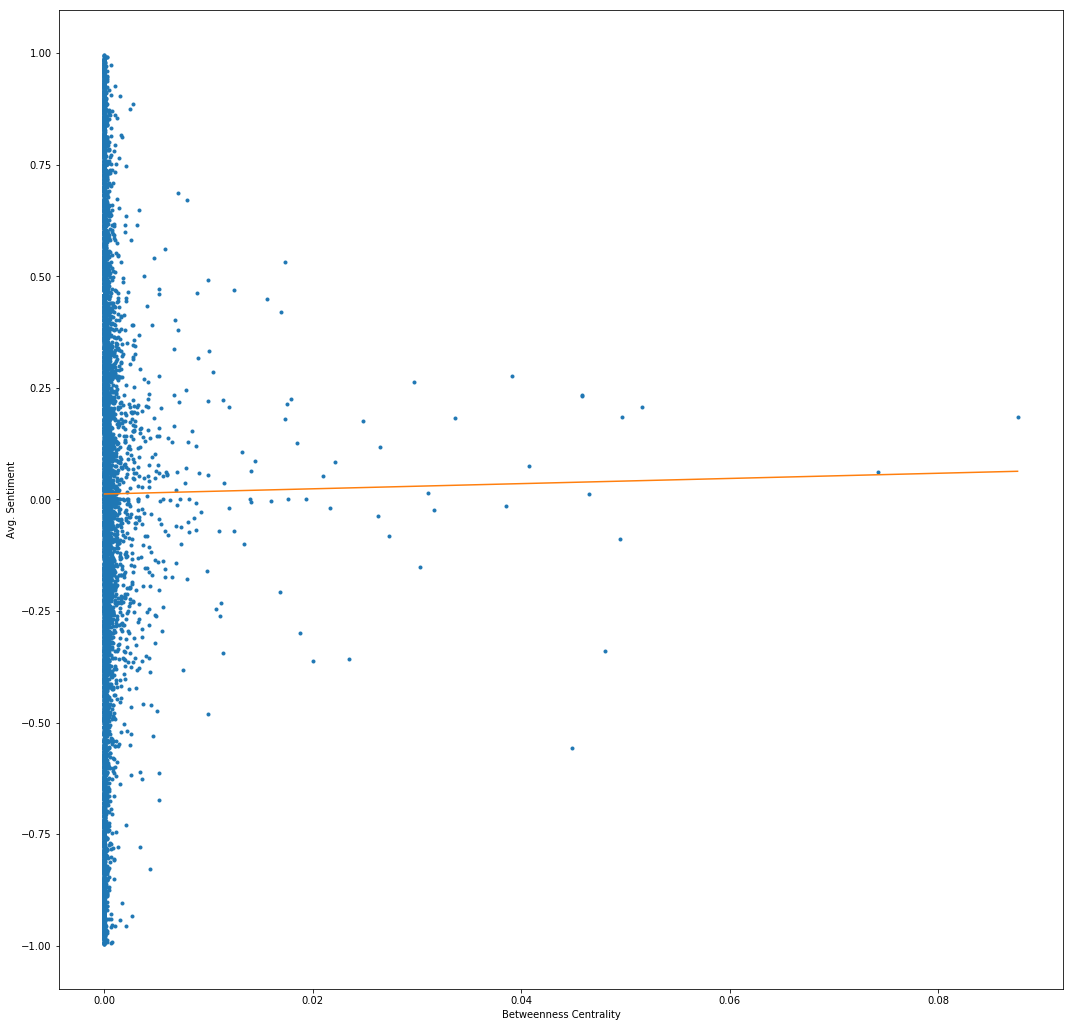

<Figure size 432x288 with 0 Axes>

In [109]:
import numpy as np

x = sentiment_analysis.loc[:,"betweenness"].values
y = sentiment_analysis.loc[:,"avg_sentiment"].values

# Least squares polynomial fit
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(18, 18))
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
plt.xlabel("Betweenness Centrality")
plt.ylabel("Avg. Sentiment")
plt.show()
plt.gcf().clear()

In [67]:
# Compute Pearson correlation coefficient and the p-value for testing non-correlation
scipy.stats.pearsonr(x, y)

(0.0031028968504792603, 0.7607199687753727)

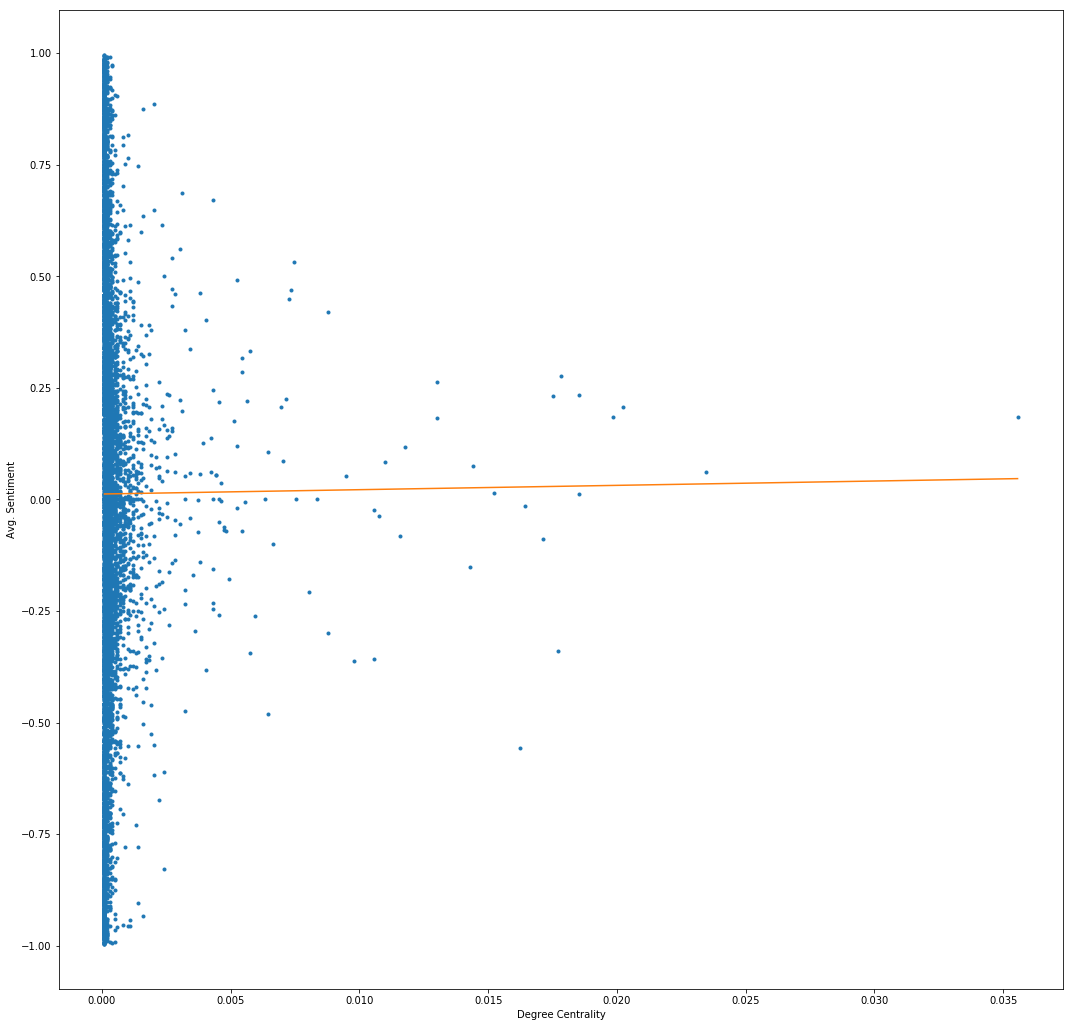

<Figure size 432x288 with 0 Axes>

In [111]:
x = sentiment_analysis.loc[:,"degree"].values
y = sentiment_analysis.loc[:,"avg_sentiment"].values

# Least squares polynomial fit
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(18, 18))
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
plt.xlabel("Degree Centrality")
plt.ylabel("Avg. Sentiment")
plt.show()
plt.gcf().clear()

In [70]:
# Compute Pearson correlation coefficient and the p-value for testing non-correlation
scipy.stats.pearsonr(x, y)

(0.0020811153393344942, 0.8381566467613414)

## Conclusion

We found that there is no evidence of centrality and sentiment. We attempted to find out in this project if positive or negative comments increased or decreased the significance of a node in the network. From the Table 1:1 we see the sentiment score and centrality measures are independent of each other.

There were many nodes that were equally important. They formed their own subnetwork. This finding is consistent with the nature of discussion forums. Groups are formed around the topics of discussion.

In a discussion forum network there could be moderator nodes that is important. These nodes should be eliminated from the network to get a meaningful data. The comments could be emoji, common words and symbols like ditto etc. They are difficult to analyze for sentiments. There is also a complexity of large data. It takes time to load and analyze these datasets. If we need a real-time analysis then we have to stream them and add to the network constantly.

References:

- https://www.youtube.com/watch?v=HJ4Hcq3YX4k (Gephi)
- https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/ (VADER Sentiment Analysis)